# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not.

**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics

In [2]:
titanic = pd.read_csv('titanicMachLearn.csv')
titanic.head()

,SES,Fare,Survived
0,39,15,0
1,83,33,1
2,98,25,1
3,67,33,1
4,36,14,0


In [56]:
X = np.array(titanic.iloc[:, [0,1]])  # Predictor
y = np.array(titanic.iloc[:, 2])      # Target

In [59]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print('x_train:',x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (712, 2)
x_test: (179, 2)
y_train: (712,)
y_test: (179,)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [62]:
# KNN fit
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Create KNN Predictor
y_pred = knn.predict(x_test)

In [65]:
# Classifier Performance
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

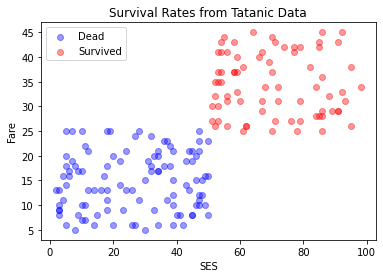

In [67]:
colors = ['blue', 'red']
survival = ['Dead', 'Survived']

for i, color, target_name in zip(range(3), colors, survival):
    plt.scatter(x_test[y_pred == i, 0], x_test[y_pred == i, 1],
                color = color, label = target_name, alpha = 0.4)

plt.xlabel("SES")
plt.ylabel("Fare")
plt.legend(loc="upper left")
plt.title('Survival Rates from Tatanic Data')
plt.show()

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best based on the pair-pair plot we did in class (i.e. don't use the exact same variables we used in the in-class tutorial).

Compare the results with the results we got in class using the first two variables.

In [73]:
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [74]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
X = iris.data     # predictor matrix
y = iris.target   # target vector

In [87]:
X = iris.data[:, 1:3]  # Use only the `sepal width` and `petal length`
y = iris.target

In [88]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
print('x_train:',x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (120, 2)
x_test: (30, 2)
y_train: (120,)
y_test: (30,)


In [90]:
# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# KNN fit
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
# Create KNN Predictor
y_pred = knn.predict(x_test)

In [92]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



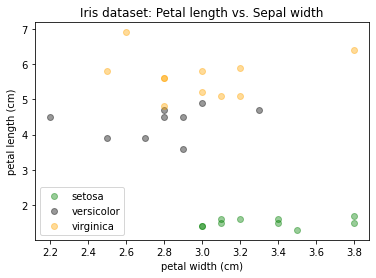

In [98]:
colors = ['green', 'black', 'orange']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(x_test[y_pred == i, 0], x_test[y_pred == i, 1],
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[3]) # Sepal width
plt.ylabel(iris.feature_names[2]) # petal length
plt.legend(loc= 'lower left')
plt.title('Iris Dataset: Petal length vs. Sepal width')
plt.show()